In [1]:
import pandas as pd
df = pd.read_csv("smart_grid_stability_augmented.csv")

In [2]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [4]:
df['stabf'] = df['stabf'].map({
    'stable': 1,
    'unstable': 0
})

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.4 MB


In [7]:
y = df.iloc[:, -1]
X = df.drop('stabf', axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 56)

In [9]:
X_train.shape

(38400, 13)

In [10]:
from tensorflow import keras

In [11]:
check_pointss = keras.callbacks.ModelCheckpoint("MinorProject.h5")

early_stoppingg = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [12]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=13),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 17,845
Trainable params: 17,819
Non-trainable params: 26
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=40, 
                    validation_data = (X_val, y_val), callbacks=[check_pointss, early_stoppingg])

Epoch 1/40
1200/1200 [==============================] - 6s 4ms/step - loss: 0.1263 - accuracy: 0.9469 - val_loss: 0.0640 - val_accuracy: 0.9744
Epoch 2/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0987 - accuracy: 0.9579 - val_loss: 0.0489 - val_accuracy: 0.9879
Epoch 3/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0930 - accuracy: 0.9598 - val_loss: 0.0452 - val_accuracy: 0.9873
Epoch 4/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0909 - accuracy: 0.9611 - val_loss: 0.0440 - val_accuracy: 0.9904
Epoch 5/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0885 - accuracy: 0.9629 - val_loss: 0.0489 - val_accuracy: 0.9904
Epoch 6/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9601 - val_loss: 0.0454 - val_accuracy: 0.9834
Epoch 7/40
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0924 - accuracy: 0.9609 - val_loss: 0.0517 - val_accuracy:

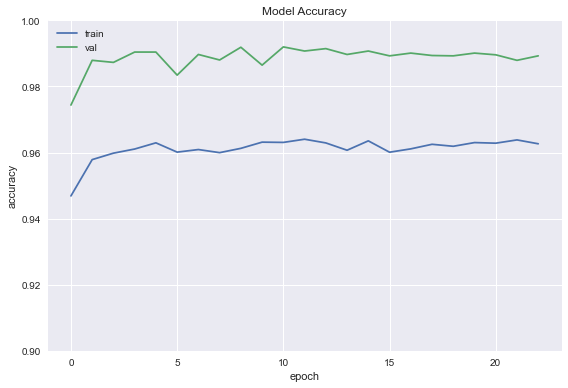

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.grid(True)
plt.gca().set_ylim(0.9, 1.0)
plt.tight_layout()
plt.show()

In [17]:
y_pred = model.predict(X_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9934166666666666

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7629,   54],
       [  25, 4292]], dtype=int64)

In [20]:
df_cm = pd.DataFrame(cm, index=['unstable', 'stable'], columns=['unstable', 'stable'])

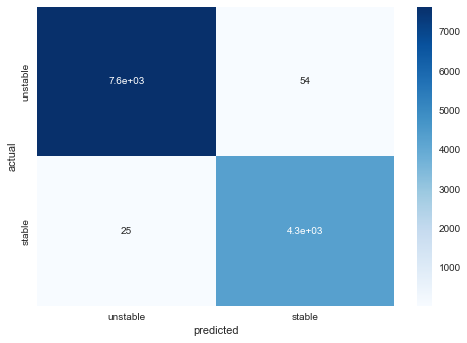

In [21]:
import seaborn as sns
cm_sns = sns.heatmap(df_cm, cmap="Blues", annot=True)
cm_sns.set_xlabel('predicted')
cm_sns.set_ylabel('actual')
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('f1score:', f1_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))

f1score: 0.9908807572434492
precision_score: 0.9875747814081914
recall_score: 0.9942089413944869
